## Necessary imports, vectorizing and transforming data into NMF matrix, and printing of resulting topics

In [2]:
import numpy as np
 
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.decomposition import NMF
 
with open('doj_c.pkl','rb') as f:
    doj = pickle.load(f)
data = doj['contents']
import string
import unidecode
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re

def customtokenizer(article):
    punc = str.maketrans('','',string.punctuation+"''``''``\"")
    article_c = article.translate(punc)
    dig = str.maketrans('','',string.digits)
    article_c=article_c.translate(dig)
    article_c = unidecode.unidecode(article_c)
    article_c = article_c.lower()
    regex = re.compile(r'(?u)\b\w\w+\b')
    article_c = re.findall(regex,article_c)
    stop_words = stopwords.words('english')
    article_c = [y for y in article_c if y not in stop_words]
    stemmer = SnowballStemmer('english')
    article_c = [stemmer.stem(y) for y in article_c] 
    return article_c

In [3]:
vectorizer = TfidfVectorizer(tokenizer=customtokenizer,max_features=2000, min_df=50,max_df=.75, stop_words=stopwords.words('english'))
 
X = vectorizer.fit_transform(data)
 
idx_to_word = np.array(vectorizer.get_feature_names())

/Users/madisonobrienjones/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldv', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youv'] not in stop_words.
  sorted(inconsistent))


In [4]:
nmf = NMF(n_components=25, solver="mu")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 
# print the topics
 
for i, topic in enumerate(H):
 
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word[topic.argsort()[-20:]]])))

Topic 1: plea,pay,special,also,fbi,conspiraci,admit,judg,prosecut,count,agent,year,charg,plead,offic,prison,trial,guilti,crimin,sentenc
Topic 2: fraudul,client,websit,expens,deduct,complaint,credit,revenu,claim,refund,file,custom,busi,fals,injunct,incom,ir,return,prepar,tax
Topic 3: clinic,florida,forc,medicaid,therapi,kickback,servic,fraudul,hhs,home,strike,beneficiari,bill,patient,hhsoig,medic,fraud,care,health,medicar
Topic 4: said,equal,prohibit,tenant,harass,alleg,apart,race,complaint,act,settlement,disabl,famili,lawsuit,hud,civil,right,fair,discrimin,hous
Topic 5: launch,via,video,epidem,apprehend,rescu,internet,obscen,abus,minor,imag,ceo,safe,project,children,childhood,sexual,exploit,pornographi,child
Topic 6: site,reduc,natur,decre,compani,requir,plant,wast,facil,environ,oil,discharg,clean,emiss,water,environment,settlement,air,pollut,epa
Topic 7: carlin,join,syria,new,provid,york,attempt,isi,fbi,state,organ,nation,secur,travel,materi,terror,attack,support,isil,terrorist
Topic 

Topic 1 - Criminal Trials:   plea,pay,special,admit,also,fbi,judg,conspiraci,prosecut,count,agent,charg,year,plead,offic,prison,trial,guilti,crimin,sentenc  
Topic 2 - Taxes:   fraudul,client,websit,expens,deduct,complaint,credit,revenu,claim,refund,file,custom,busi,fals,injunct,incom,ir,return,prepar,tax  
Topic 3 - Benefits:   miami,clinic,florida,medicaid,therapi,servic,kickback,fraudul,hhs,home,strike,beneficiari,bill,patient,hhsoig,medic,fraud,care,health,medicar  
Topic 4 - Discrimination:   said,equal,prohibit,tenant,harass,apart,alleg,race,complaint,act,settlement,disabl,famili,lawsuit,hud,civil,right,fair,discrimin,hous  
Topic 5 - Child Pornography:   launch,via,video,epidem,apprehend,rescu,internet,obscen,abus,minor,imag,ceo,project,safe,children,childhood,sexual,exploit,pornographi,child  
Topic 6 - Environment:   complianc,million,natur,consent,site,reduc,compani,decre,requir,environ,facil,plant,water,clean,environment,emiss,settlement,pollut,air,epa  
Topic 7 - Terrorism:   unit,join,syria,new,york,provid,attempt,isi,state,fbi,organ,secur,nation,travel,materi,terror,attack,support,isil,terrorist  
Topic 8 - Market regulation:   maximum,propos,particip,execut,compani,agre,twice,anticompetit,ongo,charg,conspiraci,industri,automot,rig,fine,competit,bid,fix,price,antitrust  
Topic 9 - Immigration:   hear,employe,practic,origin,nation,elig,impair,verif,provis,hire,hotlin,status,antidiscrimin,discrimin,worker,citizenship,immigr,ina,osc,employ  
Topic 10 - Prisoners:   perez,obstruct,beat,prison,hate,abus,constitut,former,sheriff,jail,fbi,incid,counti,violat,correct,offic,assault,inmat,civil,right  
Topic 11 - Civil trials:   juri,unseal,beyond,fals,doubt,supersed,face,accus,unless,maximum,grand,mere,proven,innoc,presum,defend,count,charg,alleg,indict  
Topic 12 - Accessibility:   initi,complianc,line,modif,american,ensur,facil,requir,tollfre,accommod,citi,equal,individu,peopl,counti,civic,agreement,access,disabl,ada  
Topic 13 - Corruption:   former,navi,militari,iraq,afghanistan,award,payment,crimin,corrupt,procur,fcpa,compani,offici,defens,govern,contractor,briberi,armi,bribe,contract  
Topic 14 - Whistleblowers:   servic,unit,medicaid,lawsuit,recoveri,whistleblow,physician,state,act,resolv,patient,program,hospit,govern,alleg,fals,care,settlement,claim,health  
Topic 15 - Drugs:   cocain,crimin,robberi,rival,sheriff,violenc,street,enterpris,drug,firearm,polic,ms,counti,aka,abt,texa,racket,murder,member,gang  
Topic 16 - Fraud:   mail,file,count,use,coconspir,sentenc,obtain,debit,prison,middl,fraud,card,fraudul,check,aggrav,alabama,stolen,theft,refund,ident  
Topic 17 - White collar crime:   money,million,trade,victim,wire,market,credit,crime,borrow,lend,forc,scheme,invest,task,mortgag,investor,bank,loan,fraud,financi  
Topic 18 - Elections:   discriminatori,ensur,section,oversea,offici,personnel,requir,activ,languag,feder,counti,act,ballot,jurisdict,monitor,observ,poll,voter,elect,vote  
Topic 19 - Consumer issues:   protect,pharmaceut,inspect,misbrand,adulter,injunct,dea,civil,defend,supplement,compani,prescript,complaint,distribut,consum,manufactur,product,food,fda,drug  
Topic 20 - Native Americans:   agenc,cop,work,holder,public,safeti,nation,school,indian,award,grant,crime,offic,enforc,polic,program,law,violenc,tribal,communiti  
Topic 21 - Real estate:   forc,select,northern,task,mortgag,financi,counti,homeown,fraud,california,public,francisco,properti,san,rig,bid,real,foreclosur,estat,auction  
Topic 22 - Trafficking:   civil,vulner,wildlif,smuggl,prosecut,immigr,young,said,mexico,labor,state,unit,right,women,crime,human,prostitut,sex,traffick,victim   
Topic 23 - Veterans:  file,oblig,armi,job,serv,duti,civilian,veteran,complaint,member,posit,uniform,labor,servicememb,servic,right,militari,reemploy,employ,userra  
Topic 24 - Ocean pollution:   environ,illeg,marin,speci,engin,book,ocean,oili,environment,record,wast,wildlif,fish,water,discharg,vessel,ship,guard,oil,coast  
Topic 25 - Offshore accounts:   entiti,fund,transfer,open,program,agreement,disclosur,accounthold,foreign,switzerland,taxpay,client,ir,asset,ub,undeclar,offshor,swiss,account,bank


### Assigning each document the topic it corresponds to most strongly

In [5]:
import operator
topics = []
for item in W:
    max_index, max_value = max(enumerate(item), key=operator.itemgetter(1))
    topics.append(max_index) 
    
doj["topicnumber"] = pd.Series([x+1 for x in topics], index=doj.index)


### Assigning probability for that topic to new column to indicate strength of correlation with that topic

In [6]:
topics_likelihood = []
for item in W:
    max_index, max_value = max(enumerate(item), key=operator.itemgetter(1))
    topics_likelihood.append(max_value)
    
doj["strengthoftopic"] = pd.Series(topics_likelihood, index=doj.index)


In [ ]:
with open("topics.pkl", "wb") as f:
    pickle.dump(doj, f)

In [ ]:
doj.info()

### Making year column to make organization easier later

In [7]:
doj['year'] = doj['date'].dt.year
doj['year'].head()

0    2014
1    2012
2    2011
3    2010
4    2018
Name: year, dtype: int64

### Plotting distribution of topics -- Topic 2 and 20 seem to be biggest

(array([ 797., 1506.,  811.,  438.,  448.,  607.,  593.,  576.,  231.,
         718.,  555.,  283.,  733.,  477.,  424.,  396.,  543.,  213.,
         466.,  964.,  127.,  379.,  151.,  391.,  254.]),
 array([ 1.  ,  1.96,  2.92,  3.88,  4.84,  5.8 ,  6.76,  7.72,  8.68,
         9.64, 10.6 , 11.56, 12.52, 13.48, 14.44, 15.4 , 16.36, 17.32,
        18.28, 19.24, 20.2 , 21.16, 22.12, 23.08, 24.04, 25.  ]),
 <a list of 25 Patch objects>)

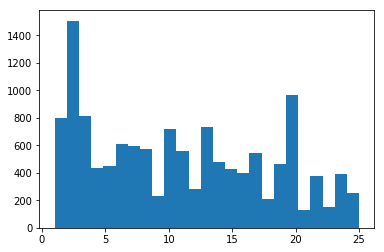

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(doj['topicnumber'],bins=25)

In [ ]:
doj.to_csv('topics.csv')

### Assigning topic names and adding to dataframe for readability

In [9]:
topicnames = {
    1: 'Criminal Trials',
    2: 'Taxes',
    3: 'Benefits',
    4: 'Discrimination',
    5: 'Child Pornography',
    6: 'Environment',
    7: 'Terrorism',
    8: 'Market Regulation',
    9: 'Immigration',
    10: 'Prisoners',
    11: 'Civil Trials',
    12: 'Accessibility',
    13: 'Corruption',
    14: 'Whistleblowers',
    15: 'Drugs',
    16: 'Fraud',
    17: 'White Collar Crime',
    18: 'Elections',
    19: 'Consumer Issues',
    20: 'Native Americans',
    21: 'Real Estate',
    22: 'Human Trafficking',
    23: 'Veterans',
    24: 'Maritime Issues/Ocean Pollution',
    25: 'Offshore Accounts',
}

In [10]:
doj['topicname'] = None
for i in doj.index:
    doj.at[i,'topicname'] = topicnames[doj.at[i,'topicnumber']]

In [ ]:
doj.head()

In [146]:
with open("topics.pkl", "wb") as f:
    pickle.dump(doj, f)

doj.to_csv('topics.csv')